In [389]:
# importing commonly used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering, KMeans

In [390]:
#jupyter notebook executed using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [391]:
df_fuel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Tasks/FuelConsumption.csv') #reading the csv file with pandas

In [392]:
# data preview
df_fuel.head()

,MODEL_YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUELTYPE,FUEL CONSUMPTION (CITY (L/100 km)),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274


In [393]:
#renaming some of the columns
df_fuel.rename(columns={'MODEL_YEAR': 'MODEL YEAR',
    'MODEL (# = high output engine) ': 'MODEL',
                   'ENGINE SIZE (L)': 'ENGINE SIZE', 
                   'FUEL CONSUMPTION (CITY (L/100 km))': 'FUEL CONSUMPTION CITY', 
                   'FUEL CONSUMPTION HWY (L/100 km)': 'FUEL CONSUMPTION HWY', 
                             'FUEL CONSUMPTION COMB (L/100 km)': 'FUEL CONSUMPTION COMB',
                             'COMB (mpg)': 'COMB MPG',
                             'CO2 EMISSIONS (g/km)': 'CO2 EMISSIONS'},inplace=True)

In [394]:
df_fuel.info() # summary information from the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MODEL YEAR             5359 non-null   int64  
 1   MAKE                   5359 non-null   object 
 2   MODEL                  5359 non-null   object 
 3   VEHICLE CLASS          5359 non-null   object 
 4   ENGINE SIZE            5359 non-null   float64
 5   CYLINDERS              5359 non-null   int64  
 6   TRANSMISSION           5359 non-null   object 
 7   FUELTYPE               5359 non-null   object 
 8   FUEL CONSUMPTION CITY  5359 non-null   float64
 9   FUEL CONSUMPTION HWY   5359 non-null   float64
 10  FUEL CONSUMPTION COMB  5359 non-null   float64
 11  COMB MPG               5359 non-null   int64  
 12  CO2 EMISSIONS          5359 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 544.4+ KB


# Features split

In [395]:
# split data to object and numerical 
numerical_df=df_fuel.select_dtypes(exclude = 'object')   #numeric (int, float)
object_df=df_fuel.select_dtypes(include = 'object')   # object (string)

In [396]:
#  derive numerical and cat columns
numerical_col = [x for x in df_fuel.columns if df_fuel[x].dtype in [int, float]]
categorical_col = [x for x in df_fuel.columns if df_fuel[x].dtype==object]

In [397]:
print(numerical_col)
print(categorical_col)

['MODEL YEAR', 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION CITY', 'FUEL CONSUMPTION HWY', 'FUEL CONSUMPTION COMB', 'COMB MPG', 'CO2 EMISSIONS']
['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUELTYPE']


##  Model Building

### 2 Model based on Numerical variables

In [398]:
#  derive feature matrix, X and target vector, y  (drop CO2 Emissions as it is the target to predict)
X = df_fuel.drop('CO2 EMISSIONS', axis=1)
y = df_fuel['CO2 EMISSIONS']

In [399]:
#  definining the numerical and categorical features
numerical_col = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_col = [x for x in X.columns if X[x].dtype==object]

In [400]:
#  split into training & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                  random_state=20)

In [401]:
#scale
#define scaler
scaler = MinMaxScaler()

#fit scaler
scaler.fit(X_train[numerical_col])

X_train[numerical_col] = scaler.transform(X_train[numerical_col])
X_val[numerical_col] = scaler.transform(X_val[numerical_col])

In [402]:
X_train[numerical_col].head()

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB,COMB MPG
2900,0.50,0.081081,0.142857,0.169884,0.152866,0.164319,0.469388
2322,0.50,0.189189,0.142857,0.444015,0.414013,0.431925,0.183673
1849,0.25,0.081081,0.142857,0.169884,0.114650,0.154930,0.489796
5199,1.00,0.270270,0.285714,0.343629,0.248408,0.309859,0.285714
3212,0.75,0.364865,0.285714,0.324324,0.261146,0.300469,0.285714


In [403]:
#  define model
model1 = LinearRegression()

#  fit model
model1.fit(X_train[numerical_col], y_train)

# make predictions
predictions_1 = model1.predict(X_val[numerical_col])

#  produce metrics
mean_absolute_error_1 = mean_absolute_error(y_val, predictions_1)
mean_squared_error_1 = mean_squared_error(y_val, predictions_1)
r2_score_1 = r2_score(y_val, predictions_1)

print(f"Mean absolute error for model1 is: {mean_absolute_error_1}")
print(f"Mean squared error for model1  is: {mean_squared_error_1}")
print(f"The R2 score for model1 based is: {r2_score_1}")

Mean absolute error for model1 is: 15.33083197620092
Mean squared error for model1  is: 531.2411225023397
The R2 score for model1 based is: 0.8746588151347968


In [404]:
#  derive coefficients
model1.coef_

array([  -5.71323138,   32.27617598,  139.16410988,  299.98744209,
        190.55419532, -421.08458868, -193.97141979])

In [405]:
# derive intercept
model1.intercept_

252.96745952803718

In [406]:
#  cross validation 
cv_score = cross_val_score(model1, X[numerical_col], y, cv=4, scoring='neg_mean_absolute_error')

In [407]:
cv_score.mean() * -1

15.41356788805227

In [408]:
df_fuel[['MODEL YEAR', 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION CITY', 'FUEL CONSUMPTION HWY', 'FUEL CONSUMPTION COMB', 'COMB MPG']].mean()

MODEL YEAR               2012.014742
ENGINE SIZE                 3.491901
CYLINDERS                   5.962120
FUEL CONSUMPTION CITY      13.902650
FUEL CONSUMPTION HWY        9.932208
FUEL CONSUMPTION COMB      12.116328
COMB MPG                   25.168875
dtype: float64

Model 2 - 'ENGINE SIZE', 'COMB MPG'

In [409]:
#  define model2 - ['ENGINE SIZE', 'COMB MPG']
model2 = LinearRegression()

#  fit model
model2.fit(X_train[['ENGINE SIZE', 'COMB MPG']], y_train)

# make predictions
predictions_2 = model2.predict(X_val[['ENGINE SIZE', 'COMB MPG']])

In [410]:
#  produce metrics
mean_absolute_error_2 = mean_absolute_error(y_val, predictions_2)
mean_squared_error_2 = mean_squared_error(y_val, predictions_2)
r2_score_2 = r2_score(y_val, predictions_2)

print(f"Mean absolute error for model2  is: {mean_absolute_error_2}")
print(f"Mean squared error for model2 is: {mean_squared_error_2}")
print(f"The R2 score for model2 is: {r2_score_2}")


Mean absolute error for model2  is: 16.141097480241598
Mean squared error for model2 is: 601.3023108651417
The R2 score for model2 is: 0.8581285579869814


In [411]:
#  derive coefficients
model2.coef_

array([ 126.67657778, -272.29370048])

In [412]:
# derive intercept
model2.intercept_

303.72001414810904

In [413]:
#  cross validation 
cv_score = cross_val_score(model2, X[['ENGINE SIZE', 'COMB MPG']], y, cv=4, scoring='neg_mean_absolute_error')

In [414]:
cv_score.mean() * -1

16.409689215924118

In [415]:
df_fuel[['ENGINE SIZE', 'COMB MPG']].mean()

ENGINE SIZE     3.491901
COMB MPG       25.168875
dtype: float64

Model 3 - 'CYLINDERS', 'COMB MPG'

In [416]:
#  define model3 - ['CYLINDERS', 'COMB MPG']
model3 = LinearRegression()

#  fit model - based on 'CYLINDERS', 'COMB MPG'
model3.fit(X_train[['CYLINDERS', 'COMB MPG']], y_train)

# make predictions
predictions_3 = model3.predict(X_val[['CYLINDERS', 'COMB MPG']])

In [417]:
#  produce metrics
mean_absolute_error_3 = mean_absolute_error(y_val, predictions_3)
mean_squared_error_3 = mean_squared_error(y_val, predictions_3)
r2_score_3 = r2_score(y_val, predictions_3)

print(f"Mean absolute error for model3 is: {mean_absolute_error_3}")
print(f"Mean squared error for model3 is: {mean_squared_error_3}")
print(f"The R2 score for model3 is: {r2_score_3}")

Mean absolute error for model3 is: 16.213950106383066
Mean squared error for model3 is: 591.6419438103794
The R2 score for model3 is: 0.8604078277979726


In [418]:
#  derive coefficients
model3.coef_

array([ 179.87951152, -278.47288866])

In [419]:
# derive intercept
model3.intercept_

297.20272930589533

In [420]:
#  cross validation 
cv_score = cross_val_score(model3, X[['CYLINDERS', 'COMB MPG']], y, cv=4, scoring='neg_mean_absolute_error')
print(cv_score)

[-16.73331264 -17.28518848 -14.94099447 -14.24108757]


In [421]:
cv_score.mean() * -1

15.800145790888955

In [422]:
df_fuel[['CYLINDERS', 'COMB MPG']].mean()

CYLINDERS     5.962120
COMB MPG     25.168875
dtype: float64

Model 4 - 'MODEL YEAR', 'COMB MPG'

In [423]:
#  define model3 - ['MODEL YEAR', 'COMB MPG']
model4 = LinearRegression()

#  fit model - based on 'MODEL YEAR', 'COMB MPG'
model4.fit(X_train[['MODEL YEAR', 'COMB MPG']], y_train)

# make predictions
predictions_4 = model4.predict(X_val[['MODEL YEAR', 'COMB MPG']])

In [424]:
#  produce metrics
mean_absolute_error_4 = mean_absolute_error(y_val, predictions_4)
mean_squared_error_4 = mean_squared_error(y_val, predictions_4)
r2_score_4 = r2_score(y_val, predictions_4)

print(f"Mean absolute error for model4 is: {mean_absolute_error_4}")
print(f"Mean squared error for model4  is: {mean_squared_error_4}")
print(f"The R2 score for model4 is: {r2_score_4}")

Mean absolute error for model4 is: 19.04835589293151
Mean squared error for model4  is: 875.9248605827687
The R2 score for model4 is: 0.7933340337788919


In [425]:
#  derive coefficients
model4.coef_

array([  -2.47794235, -407.04514487])

In [426]:
# derive intercept
model4.intercept_

386.63985983054164

In [427]:
#  cross validation 
cv_score = cross_val_score(model4, X[['MODEL YEAR', 'COMB MPG']], y, cv=4, scoring='neg_mean_absolute_error')

In [428]:
cv_score.mean() * -1

18.492764154053376

In [429]:
df_fuel[['MODEL YEAR', 'COMB MPG']].mean()

MODEL YEAR    2012.014742
COMB MPG        25.168875
dtype: float64

Model 5 - 'CYLINDERS', 'FUEL CONSUMPTION COMB'

In [430]:
#  define model5 - [ 'CYLINDERS', 'FUEL CONSUMPTION COMB']
model5 = LinearRegression()

#  fit model - based on 'MODEL YEAR', 'FUEL CONSUMPTION COMB'
model5.fit(X_train[[ 'CYLINDERS', 'FUEL CONSUMPTION COMB']], y_train)

# make predictions
predictions_5 = model5.predict(X_val[[ 'CYLINDERS', 'FUEL CONSUMPTION COMB']])

In [431]:
#  produce metrics
mean_absolute_error_5 = mean_absolute_error(y_val, predictions_5)
mean_squared_error_5 = mean_squared_error(y_val, predictions_5)
r2_score_5 = r2_score(y_val, predictions_5)

print(f"Mean absolute error for model5 based is: {mean_absolute_error_5}")
print(f"Mean squared error for model5 based is: {mean_squared_error_5}")
print(f"The R2 score for model5 is: {r2_score_5}")

Mean absolute error for model5 based is: 18.742708022482777
Mean squared error for model5 based is: 656.8765434322556
The R2 score for model5 is: 0.8450163574006917


In [432]:
#  derive coefficients
model5.coef_

array([189.81616026, 224.62642573])

In [433]:
# derive intercept
model5.intercept_

135.68077773852292

In [434]:
#  cross validation 
cv_score = cross_val_score(model5, X[[ 'CYLINDERS', 'FUEL CONSUMPTION COMB']], y, cv=4, scoring='neg_mean_absolute_error')

In [435]:
cv_score.mean() * -1

18.541194207804597

In [436]:
df_fuel[['CYLINDERS', 'FUEL CONSUMPTION COMB']].mean()

CYLINDERS                 5.962120
FUEL CONSUMPTION COMB    12.116328
dtype: float64

Model 6 - 'ENGINE SIZE', 'FUEL CONSUMPTION COMB'

In [437]:
#  define model5 - [ 'ENGINE SIZE', 'FUEL CONSUMPTION COMB']
model6 = LinearRegression()

#  fit model - based on 'ENGINE SIZE', 'FUEL CONSUMPTION COMB'
model6.fit(X_train[[ 'ENGINE SIZE', 'FUEL CONSUMPTION COMB']], y_train)

# make predictions
predictions_6 = model6.predict(X_val[[ 'ENGINE SIZE', 'FUEL CONSUMPTION COMB']])

In [438]:
#  produce metrics
mean_absolute_error_6 = mean_absolute_error(y_val, predictions_6)
mean_squared_error_6 = mean_squared_error(y_val, predictions_6)
r2_score_6 = r2_score(y_val, predictions_6)

print(f"Mean absolute error for model6 is: {mean_absolute_error_6}")
print(f"Mean squared error for model6 is: {mean_squared_error_6}")
print(f"The R2 score for model6 is: {r2_score_6}")

Mean absolute error for model6 is: 17.7931704355534
Mean squared error for model6 is: 643.467976878071
The R2 score for model6 is: 0.848179978491109


In [439]:
#  derive coefficients
model6.coef_

array([138.42111   , 216.21228154])

In [440]:
# derive intercept
model6.intercept_

145.77021271993087

In [441]:
#  cross validation 
cv_score = cross_val_score(model5, X[[ 'ENGINE SIZE', 'FUEL CONSUMPTION COMB']], y, cv=4, scoring='neg_mean_absolute_error')
print(cv_score)

[-20.13236686 -19.71724781 -17.21966853 -16.27475675]


In [442]:
cv_score.mean() * -1  #Mean absolute error using 4 fold cross validation

18.336009987764367

In [443]:
df_fuel[['ENGINE SIZE', 'FUEL CONSUMPTION COMB']].mean()

ENGINE SIZE               3.491901
FUEL CONSUMPTION COMB    12.116328
dtype: float64

Model 7 - 'CYLINDERS', 'FUEL CONSUMPTION CITY'

In [444]:
#  define model5 - [ 'CYLINDERS', 'FUEL CONSUMPTION CITY']
model7 = LinearRegression()

#  fit model - based on 'ENGINE SIZE', 'FUEL CONSUMPTION COMB'
model7.fit(X_train[[ 'CYLINDERS', 'FUEL CONSUMPTION CITY']], y_train)

# make predictions
predictions_7 = model7.predict(X_val[[ 'CYLINDERS', 'FUEL CONSUMPTION CITY']])

In [445]:
#  produce metrics
mean_absolute_error_7 = mean_absolute_error(y_val, predictions_7)
mean_squared_error_7 = mean_squared_error(y_val, predictions_7)
r2_score_7 = r2_score(y_val, predictions_7)

print(f"Mean absolute error for model7  is: {mean_absolute_error_7}")
print(f"Mean squared error for model7 is: {mean_squared_error_7}")
print(f"The R2 score for model7  is: {r2_score_7}")

Mean absolute error for model7  is: 18.913058905833253
Mean squared error for model7 is: 660.1889408892739
The R2 score for model7  is: 0.8442348293818299


In [446]:
#  derive coefficients
model7.coef_

array([177.39487679, 239.00954294])

In [447]:
# derive intercept
model7.intercept_

130.62289247032575

In [448]:
#  cross validation 
cv_score = cross_val_score(model7, X[[ 'CYLINDERS', 'FUEL CONSUMPTION CITY']], y, cv=4, scoring='neg_mean_absolute_error')
print(cv_score)

[-19.01581611 -20.56307372 -17.70890031 -17.4549762 ]


In [449]:
cv_score.mean() * -1  #Mean absolute error using 4 fold cross validation

18.685691581955446

In [450]:
df_fuel[['CYLINDERS', 'FUEL CONSUMPTION CITY']].mean()

CYLINDERS                 5.96212
FUEL CONSUMPTION CITY    13.90265
dtype: float64

Model 8 - 'ENGINE SIZE', 'FUEL CONSUMPTION CITY'

In [451]:
#  define model5 - [ 'ENGINE SIZE', 'FUEL CONSUMPTION CITY']
model8 = LinearRegression()

#  fit model - based on 'ENGINE SIZE', 'FUEL CONSUMPTION CITY'
model8.fit(X_train[[ 'ENGINE SIZE', 'FUEL CONSUMPTION CITY']], y_train)

# make predictions
predictions_8 = model8.predict(X_val[[ 'ENGINE SIZE', 'FUEL CONSUMPTION CITY']])

In [452]:
#  produce metrics
mean_absolute_error_8 = mean_absolute_error(y_val, predictions_8)
mean_squared_error_8 = mean_squared_error(y_val, predictions_8)
r2_score_8 = r2_score(y_val, predictions_8)

print(f"Mean absolute error for model8 is: {mean_absolute_error_8}")
print(f"Mean squared error for model8 is: {mean_squared_error_8}")
print(f"The R2 score for model8 is: {r2_score_8}")

Mean absolute error for model8 is: 17.811922217326966
Mean squared error for model8 is: 634.7258697963055
The R2 score for model8 is: 0.8502425937771503


In [453]:
#  derive coefficients
model8.coef_

array([130.83449389, 230.7458933 ])

In [454]:
# derive intercept
model8.intercept_

139.81728571326255

In [455]:
#  cross validation 
cv_score = cross_val_score(model8, X[[ 'ENGINE SIZE', 'FUEL CONSUMPTION CITY']], y, cv=4, scoring='neg_mean_absolute_error')
print(cv_score)

[-19.9112656  -19.79371782 -17.25310091 -16.36948247]


In [456]:
cv_score.mean() * -1  #Mean absolute error using 4 fold cross validation

18.331891700758256

In [457]:
df_fuel[['ENGINE SIZE', 'FUEL CONSUMPTION CITY']].mean()

ENGINE SIZE               3.491901
FUEL CONSUMPTION CITY    13.902650
dtype: float64

EDA - Correlation matrix, Pairplot and Boxplot

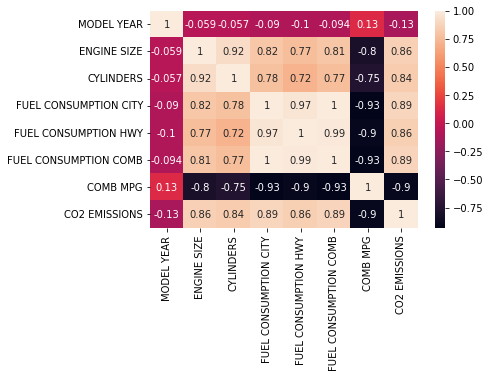

In [458]:
#  EDA
#  plot correlation matrix
sns.heatmap(df_fuel.corr(), annot=True)

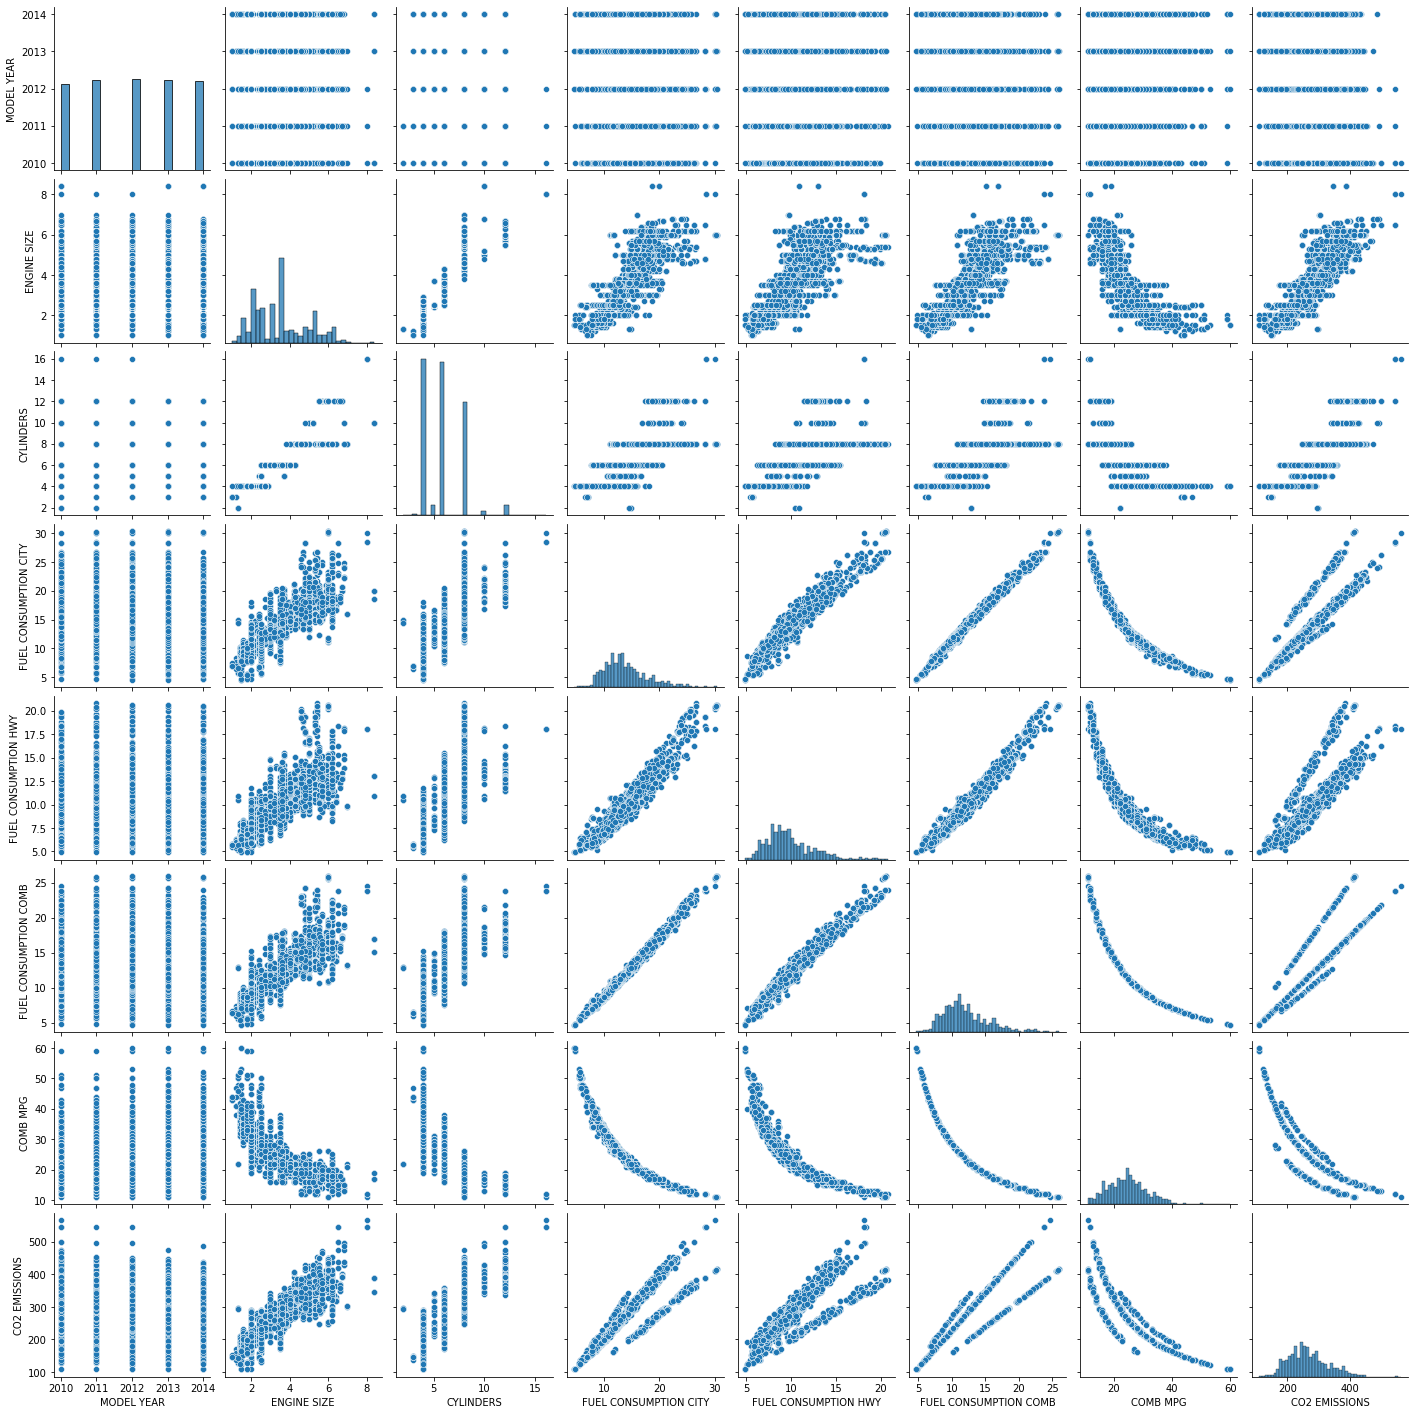

In [459]:
sns.pairplot(df_fuel)

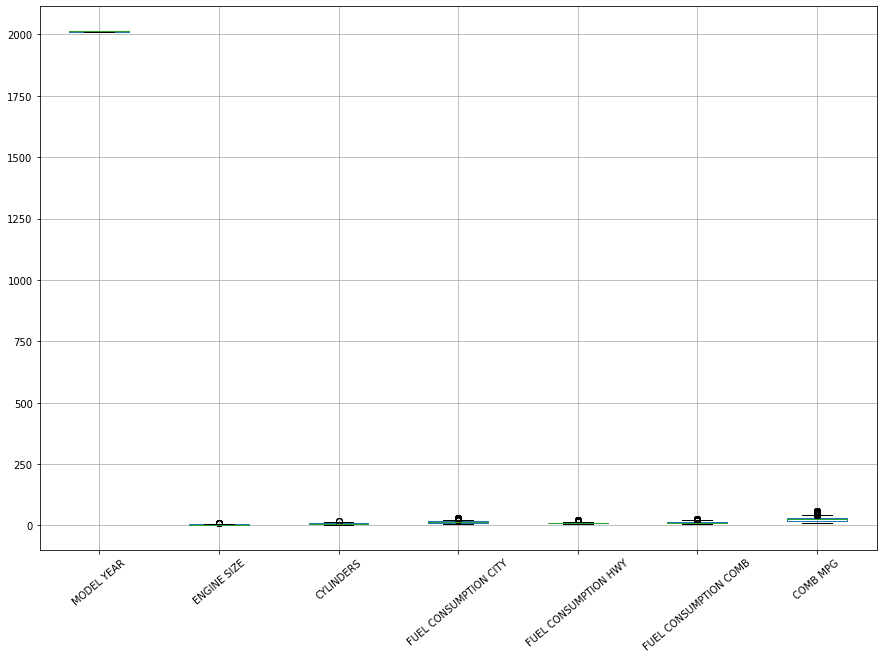

In [460]:
df_fuel[numerical_col].boxplot(figsize=(15,10), rot=40)

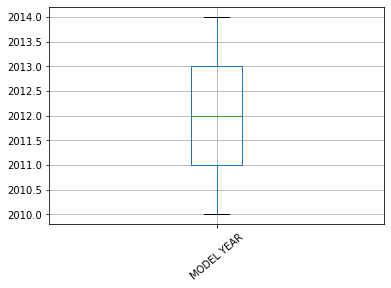

In [461]:
df_fuel[['MODEL YEAR']].boxplot(rot=40)


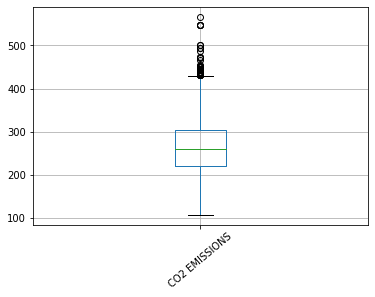

In [462]:
df_fuel[[ 'CO2 EMISSIONS']].boxplot( rot=40)


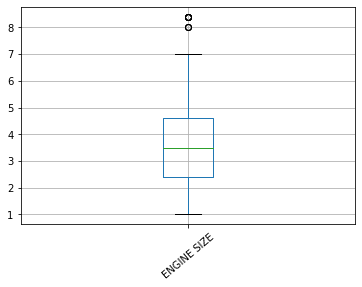

In [463]:
df_fuel[['ENGINE SIZE']].boxplot( rot=40)


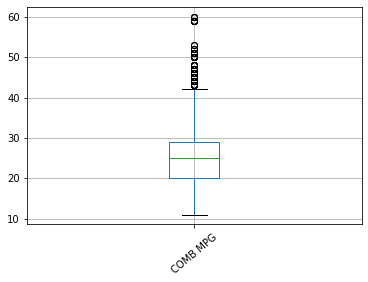

In [464]:
df_fuel[['COMB MPG']].boxplot( rot=40)


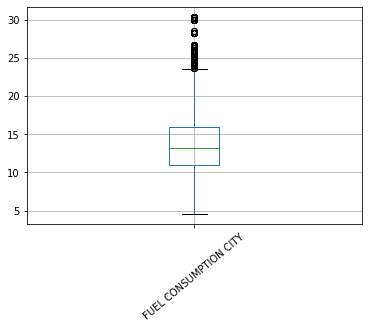

In [465]:
df_fuel[['FUEL CONSUMPTION CITY']].boxplot( rot=40)


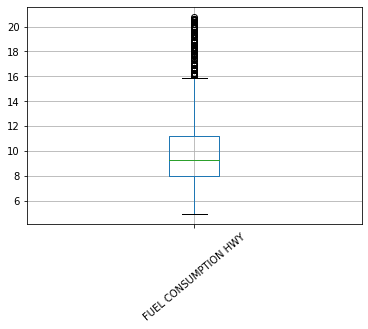

In [466]:
df_fuel[['FUEL CONSUMPTION HWY']].boxplot(rot=40)


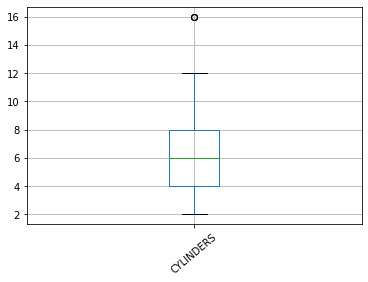

In [467]:
df_fuel[['CYLINDERS']].boxplot( rot=40)


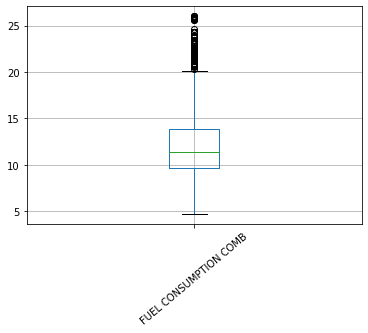

In [468]:
df_fuel[['FUEL CONSUMPTION COMB']].boxplot(rot=40)

### Q3 - Analyzing CO2 Emissions from 2010 - 2014

In [469]:
df_fuel.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUEL CONSUMPTION CITY',
       'FUEL CONSUMPTION HWY', 'FUEL CONSUMPTION COMB', 'COMB MPG',
       'CO2 EMISSIONS'],
      dtype='object')

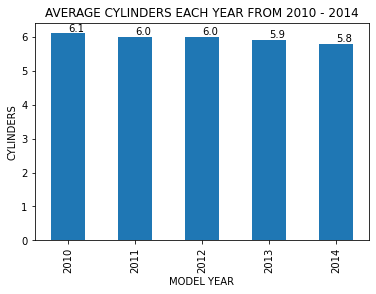

In [470]:
df_fuel.groupby('MODEL YEAR')['CYLINDERS'].mean()

#Grouping the data by 'MODEL YEAR' and getting its average 'CO2 EMISSIONS'
cyl_per_year = df_fuel.groupby('MODEL YEAR')['CYLINDERS'].mean().round(1)

#bar chart showing CO2EMISSIONS each year
cyl_per_year.plot(kind='bar', xlabel='MODEL YEAR', ylabel='CYLINDERS', 
                  title='AVERAGE CYLINDERS EACH YEAR FROM 2010 - 2014')

cyl_year_plt = cyl_per_year.plot(kind='bar')

# Add text labels to each bar
for index, value in enumerate(cyl_per_year):
    cyl_year_plt.text(index, value, str(value), va='bottom')

# Set the x-axis and y-axis labels
cyl_year_plt.set(xlabel='MODEL YEAR', ylabel='CYLINDERS')

# Set the x-axis and y-axis tick labels
cyl_year_plt.set_xticklabels(cyl_per_year.index)

# Show the plot
plt.show()



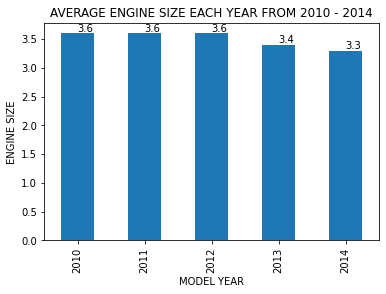

In [471]:
df_fuel.groupby('MODEL YEAR')['ENGINE SIZE'].mean()

#Grouping the data by 'CYLINDERS' and getting its average 'CO2 EMISSIONS'
eng_per_year = df_fuel.groupby('MODEL YEAR')['ENGINE SIZE'].mean().round(1)
eng_per_year

#bar chart showing engine size each year
eng_per_year.plot(kind='bar', xlabel='ENGINE SIZE', ylabel='ENGINE SIZE', 
                  title='AVERAGE ENGINE SIZE EACH YEAR FROM 2010 - 2014')

eng_year_plt = eng_per_year.plot(kind='bar')

# Add text labels to each bar
for index, value in enumerate(eng_per_year):
    eng_year_plt.text(index, value, str(value), va='bottom')

# Set the x-axis and y-axis tick labels
eng_year_plt.set_xticklabels(eng_per_year.index)

plt.show()

In [472]:
df_fuel.groupby('MODEL YEAR')['ENGINE SIZE'].mean()

MODEL YEAR
2010    3.556311
2011    3.576498
2012    3.560953
2013    3.423937
2014    3.342577
Name: ENGINE SIZE, dtype: float64

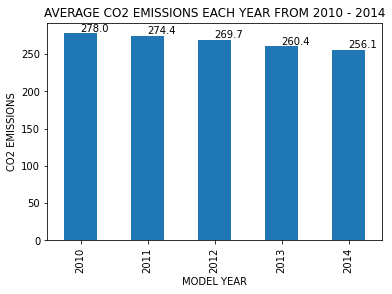

In [473]:
#Grouping the data by 'MODEL YEAR' and getting its average 'CO2 EMISSIONS'
co2_per_year = df_fuel.groupby('MODEL YEAR')['CO2 EMISSIONS'].mean().round(1)

#bar chart of CO2EMISSIONS each year
co2_per_year.plot(kind='bar', xlabel='MODEL YEAR', ylabel='CO2 EMISSIONS', 
                  title='AVERAGE CO2 EMISSIONS EACH YEAR FROM 2010 - 2014')

co2_year_plt = co2_per_year.plot(kind='bar')

# Add text labels to each bar
for index, value in enumerate(co2_per_year):
    co2_year_plt.text(index, value, str(value), va='bottom')

# Set the x-axis and y-axis tick labels
co2_year_plt.set_xticklabels(co2_per_year.index)

# Show the plot
plt.show()


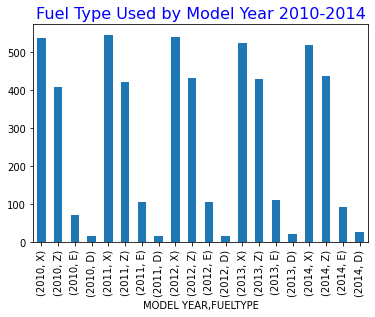

In [474]:
df_fuel.groupby('MODEL YEAR')['FUELTYPE'].value_counts().plot(kind='bar')

#Add title to the plot
plt.title('Fuel Type Used by Model Year 2010-2014', fontsize=16, color='blue')

#show the plot
plt.show()

## Encoding

In [475]:
#  define encoder
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_cat_encoded = encoder.fit_transform(X_train[categorical_col]).toarray()

In [476]:
def perform_onehot(train_set, val_set):
  assert np.array_equal(train_set.columns, val_set.columns)

  cat_cols = [x for x in train_set.columns if train_set[x].dtype==object]

  encoder = OneHotEncoder(handle_unknown='ignore')

  train_cat_encoded = encoder.fit_transform(train_set[cat_cols]).toarray()
  val_cat_encoded = encoder.transform(val_set[cat_cols]).toarray()

  feature_names = encoder.get_feature_names_out()

  train_cat_encoded = pd.DataFrame(train_cat_encoded, columns=feature_names, 
                                   index=train_set.index)
  
  val_cat_encoded = pd.DataFrame(val_cat_encoded, columns=feature_names, 
                                 index=val_set.index)
  
  train_set_encoded = pd.concat([train_set, train_cat_encoded], axis=1)
  train_set_encoded.drop(cat_cols, axis=1, inplace=True)

  val_set_encoded = pd.concat([val_set, val_cat_encoded], axis=1)
  val_set_encoded.drop(cat_cols, axis=1, inplace=True)

  return train_set_encoded, val_set_encoded

In [477]:
X_train_encoded, X_val_encoded = perform_onehot(X_train, X_val)

In [478]:
X_train_encoded

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB,COMB MPG,MAKE_ACURA,MAKE_ALFA ROMEO,MAKE_ASTON MARTIN,...,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
2900,0.50,0.081081,0.142857,0.169884,0.152866,0.164319,0.469388,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2322,0.50,0.189189,0.142857,0.444015,0.414013,0.431925,0.183673,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1849,0.25,0.081081,0.142857,0.169884,0.114650,0.154930,0.489796,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5199,1.00,0.270270,0.285714,0.343629,0.248408,0.309859,0.285714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3212,0.75,0.364865,0.285714,0.324324,0.261146,0.300469,0.285714,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.25,0.337838,0.285714,0.362934,0.331210,0.352113,0.244898,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3915,0.75,0.202703,0.142857,0.231660,0.203822,0.220657,0.387755,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1428,0.25,0.364865,0.285714,0.405405,0.420382,0.408451,0.204082,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4367,1.00,0.135135,0.142857,0.119691,0.038217,0.093897,0.632653,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [479]:
X_train_cat_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [480]:
feature_names = encoder.get_feature_names_out()

X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=feature_names, index=X_train.index)

In [481]:
X_train_encoded = pd.concat([X_train, X_train_cat_encoded], axis=1)
X_train_encoded.drop(categorical_col, axis=1, inplace=True)

In [482]:
X_train_encoded

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB,COMB MPG,MAKE_ACURA,MAKE_ALFA ROMEO,MAKE_ASTON MARTIN,...,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
2900,0.50,0.081081,0.142857,0.169884,0.152866,0.164319,0.469388,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2322,0.50,0.189189,0.142857,0.444015,0.414013,0.431925,0.183673,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1849,0.25,0.081081,0.142857,0.169884,0.114650,0.154930,0.489796,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5199,1.00,0.270270,0.285714,0.343629,0.248408,0.309859,0.285714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3212,0.75,0.364865,0.285714,0.324324,0.261146,0.300469,0.285714,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.25,0.337838,0.285714,0.362934,0.331210,0.352113,0.244898,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3915,0.75,0.202703,0.142857,0.231660,0.203822,0.220657,0.387755,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1428,0.25,0.364865,0.285714,0.405405,0.420382,0.408451,0.204082,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4367,1.00,0.135135,0.142857,0.119691,0.038217,0.093897,0.632653,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [483]:
categorical_col

['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUELTYPE']

In [484]:
#  derive  feature matrix and target vector
X = df_fuel.drop('FUELTYPE', axis=1)
y = df_fuel['FUELTYPE']

In [485]:
#  derive num and cat columns
numerical_col = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_col = [x for x in X.columns if X[x].dtype==object]

In [486]:
#  split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                  random_state=20)

In [487]:
#  scale 
#  define scaler
scaler = MinMaxScaler()

#  fit scaler
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_val[numerical_col] = scaler.transform(X_val[numerical_col])

In [488]:
#  encode
X_train_encoded, X_val_encoded = perform_onehot(X_train, X_val)

In [489]:
y_train.value_counts(normalize=True)

X    0.491019
Z    0.401679
E    0.090273
D    0.017028
Name: FUELTYPE, dtype: float64

In [490]:
# oversample
over_sampler = SMOTE(k_neighbors=2, random_state=20)

X_train_encoded, y_train = over_sampler.fit_resample(X_train_encoded, y_train)

In [491]:
y_train.value_counts(normalize=True)

Z    0.25
E    0.25
X    0.25
D    0.25
Name: FUELTYPE, dtype: float64

In [371]:
#  define model
model_c1 = LogisticRegression(max_iter=250)

#  fit model
model_c1.fit(X_train_encoded, y_train)

#  make classifications
classesc1 = model_c1.predict(X_val_encoded)

#  report
print(classification_report(y_val, classesc1))

              precision    recall  f1-score   support

           D       0.78      0.82      0.80        17
           E       0.98      0.98      0.98        94
           X       0.94      0.96      0.95       558
           Z       0.95      0.92      0.93       403

    accuracy                           0.94      1072
   macro avg       0.91      0.92      0.92      1072
weighted avg       0.95      0.94      0.94      1072



In [372]:
#  derive  feature matrix and target vector
X = df_fuel.drop('TRANSMISSION', axis=1)
y = df_fuel['TRANSMISSION']

In [373]:
#  derive num and cat columns
numerical_col = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_col = [x for x in X.columns if X[x].dtype==object]

In [374]:
#  split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                  random_state=20)

In [375]:
#  scale 
#  define scaler
scaler = MinMaxScaler()

#  fit scaler
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_val[numerical_col] = scaler.transform(X_val[numerical_col])

#  encode
X_train_encoded, X_val_encoded = perform_onehot(X_train, X_val)



In [376]:
y_train.value_counts(normalize=True)

AS6    0.195241
A6     0.174714
M6     0.154187
A4     0.087474
M5     0.060648
AS7    0.058549
AV     0.054584
A5     0.045253
AS8    0.036856
A8     0.036856
AS5    0.031491
A7     0.020527
AM7    0.019594
AS4    0.007231
AM6    0.005365
M7     0.003499
AV6    0.003499
AV7    0.001633
A9     0.001166
AM5    0.000933
AV8    0.000467
AS9    0.000233
Name: TRANSMISSION, dtype: float64

# Clustering

In [377]:
#scaling
m = MinMaxScaler()
s = StandardScaler()

In [378]:
numerical_col = df_fuel.select_dtypes(exclude='object')
numerical_col.drop('MODEL YEAR', axis=1, inplace=True)
numerical_col

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB,COMB MPG,CO2 EMISSIONS
0,2.0,4,10.9,7.8,9.5,30,219
1,2.0,4,10.0,7.6,8.9,32,205
2,2.0,4,11.6,8.1,10.0,28,230
3,3.7,6,14.8,11.3,13.2,21,304
4,2.3,4,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...
5354,3.0,6,13.4,9.8,11.8,24,271
5355,3.2,6,13.2,9.5,11.5,25,264
5356,3.0,6,13.4,9.8,11.8,24,271
5357,3.2,6,12.9,9.3,11.3,25,260


In [379]:
#scaling
m = MinMaxScaler()
s = StandardScaler()

#transform
num_scaled = s.fit_transform(numerical_col)
num_minscaled = m.fit_transform(numerical_col)

In [380]:
num_col_df = pd.DataFrame(num_scaled, columns = numerical_col.columns)

In [381]:
model = AgglomerativeClustering(n_clusters=5,linkage='single')
cluster_labels = model.fit_predict(num_scaled)

In [382]:
# the lower the db index, the better the cluster
DB_index=davies_bouldin_score(num_scaled,cluster_labels)
DB_index

0.38735686549328396

In [383]:
# the higher the sil index, the better the cluster
sil_index = silhouette_score(num_scaled, cluster_labels)
sil_index

0.33824594645312644

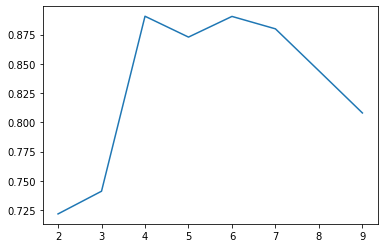

In [384]:
cluster_n = range(2,10)
labels = []
n = []
for k in cluster_n:
    model = KMeans(n_clusters=k)
    cluster_labels = model.fit_predict(num_scaled)
    DB_index=davies_bouldin_score(num_scaled,cluster_labels)
    labels.append(DB_index)
    n.append(k)
plt.plot(n, labels)
plt.show() 

In [385]:
cluster_labels = list(set(cluster_labels))
len(cluster_labels)

9

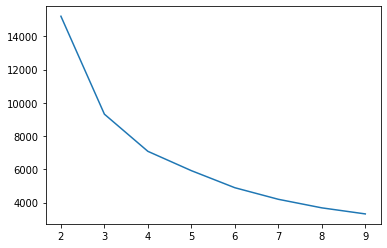

In [386]:
cluster_n = range(2,10)
sum_squared = []
n = []
for k in cluster_n:
    model = KMeans(n_clusters=k, max_iter = 200)
    model.fit(num_scaled)
    sum_squared.append(model.inertia_)
    n.append(k)
    
plt.plot(n, sum_squared)
plt.show() 

In [387]:
model = KMeans(n_clusters=6)
predict_clusters = model.fit_predict(num_scaled)

In [388]:
df_fuel['clusters'] = list(predict_clusters)
df_fuel['clusters']


#df_fuel[df_fuel.VEHICLE CLASS == 'COMPACT'].head(5)

0       2
1       2
2       2
3       1
4       4
       ..
5354    4
5355    4
5356    4
5357    4
5358    4
Name: clusters, Length: 5359, dtype: int32